<a href="https://colab.research.google.com/github/AtharvPandit07/Deep-Learning/blob/main/Binary_Classificaiton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Binary Classification Problem

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

## Read the Data Set

In [2]:
import pandas as pd
url="https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/booking_train.csv"
df=pd.read_csv(url)
df.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1


## Preform Basic Data Quality Checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42100 entries, 0 to 42099
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    42100 non-null  int64  
 1   no_of_adults                          42100 non-null  int64  
 2   no_of_children                        42100 non-null  int64  
 3   no_of_weekend_nights                  42100 non-null  int64  
 4   no_of_week_nights                     42100 non-null  int64  
 5   type_of_meal_plan                     42100 non-null  int64  
 6   required_car_parking_space            42100 non-null  int64  
 7   room_type_reserved                    42100 non-null  int64  
 8   lead_time                             42100 non-null  int64  
 9   arrival_year                          42100 non-null  int64  
 10  arrival_month                         42100 non-null  int64  
 11  arrival_date   

In [4]:
df.isna().sum()

id                                      0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [5]:
df.duplicated().sum()

0

## Seperate X & Y(Booking_Status)


In [6]:
X = df.drop(columns=["id","booking_status"])
Y = df[["booking_status"]]

In [7]:
X

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0
1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0
2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0
3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0
4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42095,3,0,0,4,0,0,1,160,2018,12,30,1,0,0,0,140.00,2
42096,2,0,0,3,0,0,0,34,2017,9,23,0,0,0,0,224.67,0
42097,2,0,0,2,2,0,0,292,2018,7,21,0,0,0,0,96.00,0
42098,1,0,0,3,0,0,0,5,2018,11,9,0,0,0,0,120.00,0


In [8]:
Y.head()

,booking_status
0,0
1,0
2,0
3,0
4,1


In [9]:

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [10]:
num_pipe = Pipeline(steps=[("impute", SimpleImputer(strategy="median")),
                           ("scaler", StandardScaler())]).set_output(transform='pandas')

In [11]:

X_pre = num_pipe.fit_transform(X)
X_pre.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,0.151040,-0.313454,-0.998814,-0.278849,1.294624,-0.160945,-0.515173,-1.170469,0.409661,-2.330398,-0.214091,0.428551,5.766758,33.699120,-0.101479,-0.998052,-0.737691
1,0.151040,-0.313454,0.130259,-0.278849,-0.407020,-0.160945,-0.515173,0.161740,0.409661,-0.209778,1.473487,-1.149928,-0.173408,-0.060506,-0.101479,-0.870153,-0.737691
2,0.151040,-0.313454,-0.998814,-0.979466,-0.407020,-0.160945,-0.515173,2.604122,0.409661,1.557404,-1.564154,-1.149928,-0.173408,-0.060506,-0.101479,-1.415406,-0.737691
3,-1.753925,-0.313454,-0.998814,-0.278849,1.294624,-0.160945,-0.515173,-0.886758,0.409661,1.557404,-1.676659,0.428551,-0.173408,-0.060506,-0.101479,-1.307702,-0.737691
4,0.151040,-0.313454,0.130259,-1.680084,-0.407020,-0.160945,-0.515173,1.901012,0.409661,0.850531,0.010919,-1.149928,-0.173408,-0.060506,-0.101479,-0.122955,-0.737691


In [12]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y,
                                                test_size=0.2, random_state=42)

In [13]:

xtrain.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
15559,0.151040,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,0.685890,-0.479694,0.409661,1.203968,-1.564154,-1.149928,-0.173408,-0.060506,-0.101479,-1.199998,1.842849
32783,0.151040,-0.313454,0.130259,1.122386,-0.407020,-0.160945,0.685890,-0.381012,0.409661,1.557404,1.135971,0.428551,-0.173408,-0.060506,-0.101479,0.189388,0.552579
11797,2.056005,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,0.685890,-0.282330,0.409661,0.497095,-0.889123,0.428551,-0.173408,-0.060506,-0.101479,1.716096,-0.737691
39750,0.151040,-0.313454,-0.998814,-0.979466,2.996268,-0.160945,-0.515173,1.444607,0.409661,0.143658,-0.439102,-1.149928,-0.173408,-0.060506,-0.101479,0.280936,0.552579
28711,0.151040,-0.313454,1.259332,0.421768,-0.407020,-0.160945,0.685890,-0.109636,0.409661,0.850531,-1.001628,0.428551,-0.173408,-0.060506,-0.101479,0.746758,-0.737691


In [14]:
ytrain.head()

,booking_status
15559,0
32783,0
11797,1
39750,1
28711,1


In [15]:
xtrain.shape

(33680, 17)

In [16]:
xtest.shape

(8420, 17)

## Building a Neural Network

In [17]:
xtrain.shape[1]

17

### Dropout layer - Randomly drop some % of neuron links

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input

In [19]:
# Initialize the model
model = Sequential()

#Input Layer
model.add(Input(shape=(xtrain.shape[1],)))

# Hidden Layer
model.add(Dense(64,activation = 'relu'))
# Add Droupout Layer 1
model.add(Dropout(0.4))

# Hidden Layer 2
model.add(Dense(32,activation = 'relu'))
# Add Droupout Layer 2
model.add(Dropout(0.3))

# Output Layer
model.add(Dense(1,activation = 'sigmoid'))


In [20]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1152      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3265 (12.75 KB)
Trainable params: 3265 (12.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
hist=model.fit(xtrain,ytrain,epochs=60,validation_split=0.2)

Epoch 1/60
842/842 [==============================] - 8s 4ms/step - loss: 0.5302 - accuracy: 0.7341 - val_loss: 0.4837 - val_accuracy: 0.7694
Epoch 2/60
842/842 [==============================] - 3s 3ms/step - loss: 0.4871 - accuracy: 0.7709 - val_loss: 0.4739 - val_accuracy: 0.7770
Epoch 3/60
842/842 [==============================] - 3s 3ms/step - loss: 0.4793 - accuracy: 0.7729 - val_loss: 0.4718 - val_accuracy: 0.7804
Epoch 4/60
842/842 [==============================] - 3s 4ms/step - loss: 0.4722 - accuracy: 0.7797 - val_loss: 0.4674 - val_accuracy: 0.7825
Epoch 5/60
842/842 [==============================] - 3s 4ms/step - loss: 0.4712 - accuracy: 0.7824 - val_loss: 0.4660 - val_accuracy: 0.7868
Epoch 6/60
842/842 [==============================] - 3s 4ms/step - loss: 0.4673 - accuracy: 0.7842 - val_loss: 0.4623 - val_accuracy: 0.7887
Epoch 7/60
842/842 [==============================] - 3s 4ms/step - loss: 0.4631 - accuracy: 0.7866 - val_loss: 0.4605 - val_accuracy: 0.7895
Epoch 

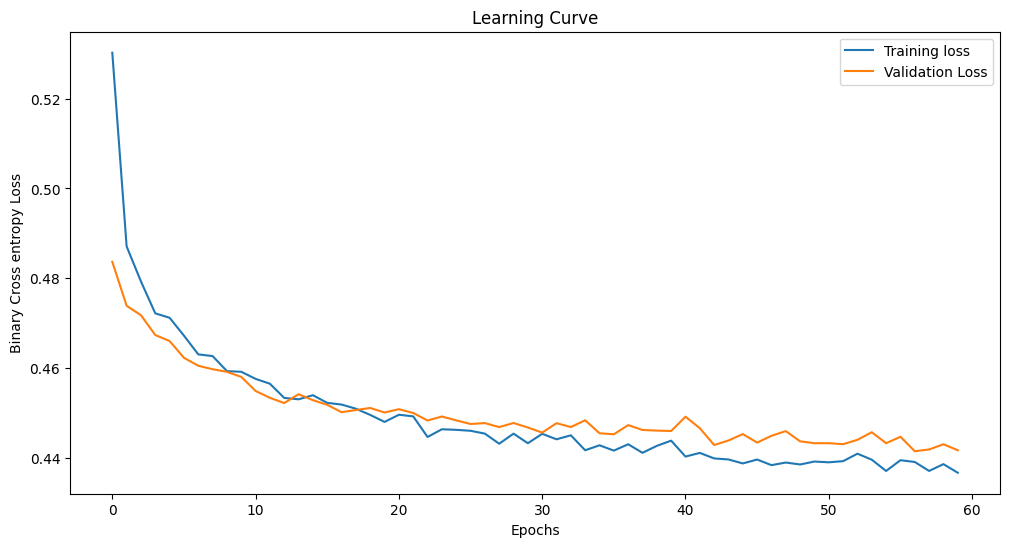

In [23]:

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(hist.history['loss'], label='Training loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Binary Cross entropy Loss")
plt.title("Learning Curve")
plt.legend()
plt.show()


In [24]:

model.evaluate(xtrain, ytrain)

1053/1053 [==============================] - 4s 4ms/step - loss: 0.4216 - accuracy: 0.8109


[0.4216035306453705, 0.8108670115470886]

In [25]:

model.evaluate(xtest, ytest)

264/264 [==============================] - 2s 6ms/step - loss: 0.4293 - accuracy: 0.8059


[0.4293152987957001, 0.8059382438659668]

## Get Predictions on train  and test

In [26]:
yprob_train = model.predict(xtrain)
yprob_test = model.predict(xtest)

264/264 [==============================] - 0s 1ms/step


In [28]:
yprob_train[0:5]

array([[0.00393614],
       [0.13840796],
       [0.82104754],
       [0.80712456],
       [0.84692717]], dtype=float32)

In [29]:
ytrain.head()

,booking_status
15559,0
32783,0
11797,1
39750,1
28711,1


In [30]:
ypred_train=[1 if prob>=0.5 else 0 for prob in yprob_train]
ypred_test=[1 if prob>=0.5 else 0 for prob in yprob_test]

In [33]:
ypred_test[0:5]

[0, 1, 0, 0, 0]

In [34]:
yprob_test[0:5]

array([[0.03967497],
       [0.9077138 ],
       [0.39157295],
       [0.01234803],
       [0.1628735 ]], dtype=float32)

### Confusion MATRIX

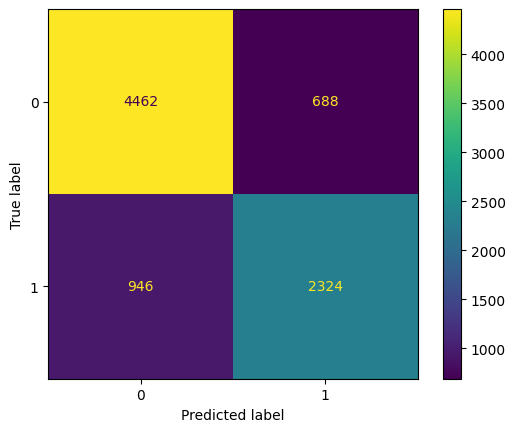

In [37]:
from sklearn.metrics import ConfusionMatrixDisplay
cf=confusion_matrix(ytrain,ypred_train)
ConfusionMatrixDisplay.from_predictions(ytest, ypred_test)

In [38]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      5150
           1       0.77      0.71      0.74      3270

    accuracy                           0.81      8420
   macro avg       0.80      0.79      0.79      8420
weighted avg       0.80      0.81      0.80      8420



In [39]:
from sklearn.metrics import roc_auc_score
roc_auc_score(ytest, yprob_test)

0.8760969092366616

# ROC_AUC score is more than 80% hence model is good

## Out of Sample Predictions

In [40]:

url2 = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/booking_test.csv"
xnew = pd.read_csv(url2)
xnew.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,42100,3,0,1,4,0,0,1,111,2018,12,5,1,0,0,0,115.60,2
1,42101,2,0,0,3,0,0,0,22,2017,10,21,0,0,0,0,85.00,0
2,42102,2,2,0,1,0,0,3,18,2018,8,10,1,0,0,0,240.00,1
3,42103,2,0,0,3,0,0,0,88,2018,5,30,0,0,0,0,80.75,0
4,42104,1,0,0,2,2,0,0,7,2018,9,21,1,0,0,0,144.00,0


In [41]:

xnew2 = xnew.drop(columns=['id'])
xnew2.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,3,0,1,4,0,0,1,111,2018,12,5,1,0,0,0,115.60,2
1,2,0,0,3,0,0,0,22,2017,10,21,0,0,0,0,85.00,0
2,2,2,0,1,0,0,3,18,2018,8,10,1,0,0,0,240.00,1
3,2,0,0,3,0,0,0,88,2018,5,30,0,0,0,0,80.75,0
4,1,0,0,2,2,0,0,7,2018,9,21,1,0,0,0,144.00,0


In [42]:

xnew2_pre = num_pipe.transform(xnew2)
xnew2_pre.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2.056005,-0.313454,0.130259,1.122386,-0.407020,-0.160945,0.685890,0.087728,0.409661,1.557404,-1.226638,0.428551,-0.173408,-0.060506,-0.101479,0.297092,1.842849
1,0.151040,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,-0.515173,-1.010111,-2.441040,0.850531,0.573445,-1.149928,-0.173408,-0.060506,-0.101479,-0.526846,-0.737691
2,0.151040,4.129777,-0.998814,-0.979466,-0.407020,-0.160945,3.088017,-1.059452,0.409661,0.143658,-0.664112,0.428551,-0.173408,-0.060506,-0.101479,3.646696,0.552579
3,0.151040,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,-0.515173,-0.195983,0.409661,-0.916652,1.585992,-1.149928,-0.173408,-0.060506,-0.101479,-0.641282,-0.737691
4,-1.753925,-0.313454,-0.998814,-0.278849,2.996268,-0.160945,-0.515173,-1.195140,0.409661,0.497095,0.573445,0.428551,-0.173408,-0.060506,-0.101479,1.061793,-0.737691


In [43]:

probs = model.predict(xnew2_pre)

878/878 [==============================] - 2s 2ms/step


In [44]:

probs[0:5]

array([[0.03941796],
       [0.02420958],
       [0.3710741 ],
       [0.14566141],
       [0.5639755 ]], dtype=float32)

In [45]:

preds = [1 if prob>=0.5 else 0 for prob in probs]
preds[0:5]

[0, 0, 0, 0, 1]

In [46]:
df_final = xnew[['id']]
df_final['booking_status'] = preds
df_final['probability'] = probs

In [47]:

df_final

,id,booking_status,probability
0,42100,0,0.039418
1,42101,0,0.024210
2,42102,0,0.371074
3,42103,0,0.145661
4,42104,1,0.563976
...,...,...,...
28063,70163,1,0.967193
28064,70164,0,0.041318
28065,70165,0,0.142320
28066,70166,0,0.421295


In [48]:

df_final['booking_status'].value_counts()

booking_status
0    18099
1     9969
Name: count, dtype: int64

<Axes: xlabel='booking_status'>

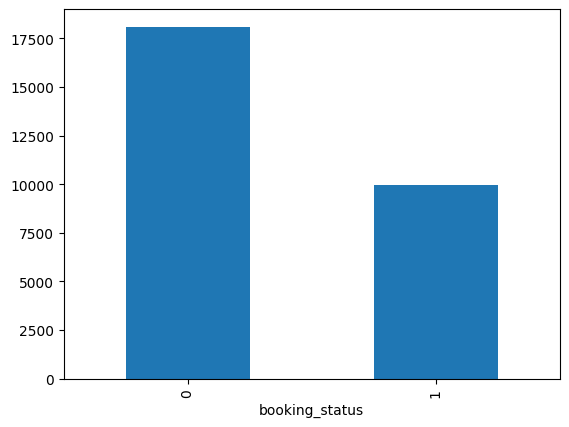

In [49]:

df_final['booking_status'].value_counts().plot(kind='bar')

In [51]:
df_final.to_csv("Results.csv", index=False)